# t-test

In [5]:
import pandas as pd

student = pd.read_csv('data/sap/t-test/student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
student[['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


In [29]:
student[['G1','G2','G3','sex']].groupby(student['sex']).agg(['count','mean','std'])

G1                         G2                         G3             \
    count       mean       std count       mean       std count       mean   
sex                                                                          
F     208  10.620192  3.232530   208  10.389423  3.641851   208   9.966346   
M     187  11.229947  3.392839   187  11.074866  3.868088   187  10.914439   

               
          std  
sex            
F    4.622338  
M    4.495297

In [34]:
import scipy.stats as stats

stat, pval = stats.ttest_ind(student.loc[student['sex']=='M']['G1'], student.loc[student['sex']=='F']['G1'],equal_var=False)
print(round(stat, 4), round(pval, 4))

stat, pval = stats.ttest_ind(student.loc[student['sex']=='M']['G2'], student.loc[student['sex']=='F']['G2'],equal_var=False)
print(round(stat, 4), round(pval, 4))

stat, pval = stats.ttest_ind(student.loc[student['sex']=='M']['G3'], student.loc[student['sex']=='F']['G3'],equal_var=False)
print(round(stat, 4), round(pval, 4))

1.8237 0.069
1.8077 0.0714
2.0651 0.0396


# One-way ANOVA

In [163]:
import pandas as pd

customer = pd.read_csv('data/sap/one-way anova/WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer.head()
print(customer.shape)

(7043, 21)


In [146]:
# 대치 옵션 1) 빈 결측값을 0으로 바꾸기

temp1 = customer.loc[customer['PaymentMethod'] == 'Electronic check']['TotalCharges'].astype(float)

temp2 = customer.loc[(customer['PaymentMethod'] == 'Mailed check')]['TotalCharges'] 
for idx in temp2.loc[temp2 == ' '].index:
    temp2[idx] = 0
temp2.astype(float)

temp3 = customer.loc[customer['PaymentMethod'] == 'Bank transfer (automatic)']['TotalCharges']
for idx in temp3.loc[temp3 == ' '].index:
    temp3[idx] = 0
temp3.astype(float)

temp4 = customer.loc[customer['PaymentMethod'] == 'Credit card (automatic)']['TotalCharges']
for idx in temp4.loc[temp4 == ' '].index:
    temp4[idx] = 0
temp4.astype(float)

/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

6       1949.40
11       326.80
12      5681.10
15      7895.15
18       528.35
         ...   
7024    3626.35
7031    3316.10
7033    2625.25
7034    6886.25
7039    7362.90
Name: TotalCharges, Length: 1522, dtype: float64

In [175]:
# 대치 옵션 2) 결측값 행 제외
customer = customer.loc[customer['TotalCharges'] != ' ']
customer['TotalCharges'] = customer['TotalCharges'].astype(float)
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [176]:
import scipy.stats as stats

stats.f_oneway(temp1, temp2, temp3, temp4)

F_onewayResult(statistic=327.5236826310482, pvalue=4.608039633507195e-199)

In [177]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data=customer['TotalCharges'].astype(float), groups=customer['PaymentMethod'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bank transfer (automatic),Credit card (automatic),-7.9035,0.9996,-205.1116,189.3045,False
Bank transfer (automatic),Electronic check,-988.4314,0.0,-1167.048,-809.8148,True
Bank transfer (automatic),Mailed check,-2024.8156,0.0,-2219.4381,-1830.1932,True
Credit card (automatic),Electronic check,-980.5278,0.0,-1159.8893,-801.1664,True
Credit card (automatic),Mailed check,-2016.9121,0.0,-2212.2183,-1821.6059,True
Electronic check,Mailed check,-1036.3843,0.0,-1212.8989,-859.8696,True


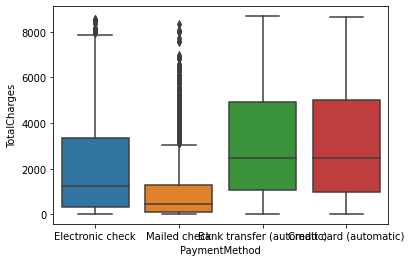

In [179]:
sns.boxplot(data=customer, x='PaymentMethod', y='TotalCharges');

## Two-way ANOVA

In [180]:
import pandas as pd

customer = pd.read_csv('data/sap/two-way anova/WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer.head()
print(customer.shape)

(7043, 21)


In [181]:
# 대치 옵션 2) 결측값 행 제외
customer = customer.loc[customer['TotalCharges'] != ' ']
customer['TotalCharges'] = customer['TotalCharges'].astype(float)
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [183]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula ='TotalCharges ~ C(PaymentMethod) + C(Contract) + C(PaymentMethod):C(Contract)'
model = ols(formula, customer).fit()
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(PaymentMethod),3.085207e+09,3.0,292.543834,5.995435e-179
C(Contract),6.243836e+09,2.0,888.074422,0.000000e+00
C(PaymentMethod):C(Contract),7.739390e+08,6.0,36.693012,4.913950e-44
Residual,2.467796e+10,7020.0,NaN,NaN


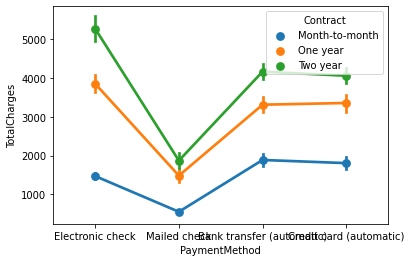

In [201]:
import seaborn as sns

sns.pointplot(x='PaymentMethod', y='TotalCharges', hue='Contract', data=customer);

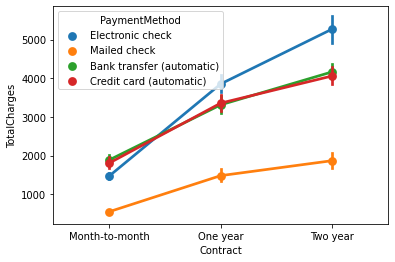

In [202]:
sns.pointplot(x='Contract', y='TotalCharges', hue='PaymentMethod', data=customer);

In [204]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data=customer['TotalCharges'].astype(float), groups=customer['PaymentMethod'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bank transfer (automatic),Credit card (automatic),-7.9035,0.9996,-205.1116,189.3045,False
Bank transfer (automatic),Electronic check,-988.4314,0.0,-1167.048,-809.8148,True
Bank transfer (automatic),Mailed check,-2024.8156,0.0,-2219.4381,-1830.1932,True
Credit card (automatic),Electronic check,-980.5278,0.0,-1159.8893,-801.1664,True
Credit card (automatic),Mailed check,-2016.9121,0.0,-2212.2183,-1821.6059,True
Electronic check,Mailed check,-1036.3843,0.0,-1212.8989,-859.8696,True


In [205]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data=customer['TotalCharges'].astype(float), groups=customer['Contract'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Month-to-month,One year,1665.4285,-0.0,1520.812,1810.045,True
Month-to-month,Two year,2359.6794,-0.0,2221.8461,2497.5126,True
One year,Two year,694.2509,-0.0,525.7369,862.7648,True


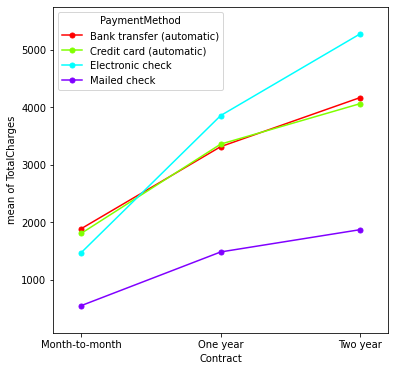

In [198]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(customer['Contract'], customer['PaymentMethod'], customer['TotalCharges'].astype(float), ms=10, ax=ax)

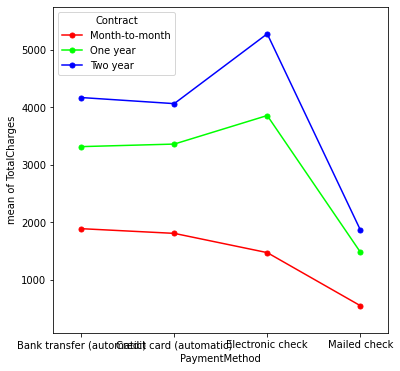

In [199]:
fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(customer['PaymentMethod'], customer['Contract'], customer['TotalCharges'].astype(float), ms=10, ax=ax)

## Repeated Measure ANOVA
 https://recipesds.tistory.com/entry/RMANOVA-Repeated-Measured-ANOVA-%EB%B0%98%EB%B3%B5%EC%B8%A1%EC%A0%95-ANOVA%EC%9D%98-%EC%9A%B0%EC%95%84%ED%95%A8

In [209]:
from statsmodels.stats.anova import AnovaRM

raw_df = pd.DataFrame({'id':[1,2,3,4,5,6], 'pre' : [45,42,36,39,51,44], 'three_month':[50,42,41,35,55,49], 'six_month':[55,45,43,40,59,56]})
raw_df

,id,pre,three_month,six_month
0,1,45,50,55
1,2,42,42,45
2,3,36,41,43
3,4,39,35,40
4,5,51,55,59
5,6,44,49,56


In [214]:
temp = {'id': [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6],
       'time' : ['pre','three_month','six_month','pre','three_month','six_month','pre','three_month','six_month','pre','three_month','six_month','pre','three_month','six_month','pre','three_month','six_month',],
       'value' : [45,50,55,42,42,45,36,41,43,39,35,40,51,55,59,44,49,56]}

print(AnovaRM(data=pd.DataFrame(temp), depvar='value', subject='id', within=['time']).fit())


              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
time 12.5340 2.0000 10.0000 0.0019



In [216]:
# 구형성 확인 Mauchy
import pingouin as pg
pg.sphericity(data=pd.DataFrame(temp), dv='value', within='time', subject='id')

SpherResults(spher=True, W=0.4335337920633405, chi2=3.3431421363856364, dof=2, pval=0.18795154886081972)

In [217]:
# 만족하지 못한다면 correction 부여
import pingouin as pg

pg.rm_anova(dv='value', within='time', subject='id', data=pd.DataFrame(temp), correction=True)

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,time,2,10,12.533981,0.001886,0.008985,0.714839,0.63838,True,0.433534,0.187952


In [218]:
# 사후검정
posthoc = pg.pairwise_ttests(dv='value', within='time', subject='id', data=pd.DataFrame(temp))
print(posthoc)

  Contrast          A            B  Paired  Parametric         T  dof  \
0     time        pre    six_month    True        True -4.016521  5.0   
1     time        pre  three_month    True        True -1.642511  5.0   
2     time  six_month  three_month    True        True  6.061281  5.0   

  alternative     p-unc    BF10    hedges  
0   two-sided  0.010156    6.82 -0.940121  
1   two-sided  0.161406   0.913 -0.364802  
2   two-sided  0.001764  25.839  0.524924  


In [220]:
df['pre']

0    45
1    42
2    36
3    39
4    51
5    44
Name: pre, dtype: int64

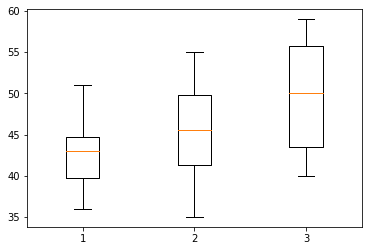

In [226]:
import matplotlib.pyplot as plt

plt.boxplot(df[['pre', 'three_month', 'six_month']]);

## Two-way RM ANOVA

In [258]:
# two-way repeated design
# 20명의 성인을 대상으로 노이즈 레벨과 텍스트 이미지에 따라 주어진 텍스트를 얼마나 잘 이해했는지

temp = {'id': list(np.arange(1,21,1)),
       'none_clear' : [46,44,51,34,55,29,34,44,50,41,46,47,38,38,50,46,44,38,40,46],
        'low_clear' : [55,61,59,45,58,64,60,57,61,63,58,55,44,47,20,51,54,48,50,52],
        'med_clear' : [68,72,79,51,45,74,79,66,59,68,72,74,70,61,58,74,78,69,70,66],
        'high_clear' : [44,51,38,37,45,39,46,51,40,50,47,55,46,53,51,42,46,51,47,41],
        'none_blur' : [15,20,21,26,11,19,16,21,22,18,17,20,24,25,19,17,17,21,22,25],
        'low_blur' : [31,34,28,30,34,33,34,36,26,29,30,27,31,27,30,26,28,20,14,24],
        'med_blur' : [70,72,66,63,74,76,60,58,74,62,68,65,66,70,74,68,69,71,64,69],
        'high_blur' : [41,46,47,38,38,50,46,44,38,40,46,40,38,42,47,36,25,39,41,42],
       }
df = pd.DataFrame(temp)
df.head()

,id,none_clear,low_clear,med_clear,high_clear,none_blur,low_blur,med_blur,high_blur
0,1,46,55,68,44,15,31,70,41
1,2,44,61,72,51,20,34,72,46
2,3,51,59,79,38,21,28,66,47
3,4,34,45,51,37,26,30,63,38
4,5,55,58,45,45,11,34,74,38


In [259]:
temp_stack = df.set_index('id').stack()
temp_stack = pd.DataFrame(temp_stack).reset_index().rename(columns={0:'value'})
temp_stack

,id,level_1,value
0,1,none_clear,46
1,1,low_clear,55
2,1,med_clear,68
3,1,high_clear,44
4,1,none_blur,15
...,...,...,...
155,20,high_clear,41
156,20,none_blur,25
157,20,low_blur,24
158,20,med_blur,69


In [260]:
temp_stack['noise'] = 0
temp_stack['image'] = 0

for i in range(len(temp_stack)):
    temp_stack['noise'][i] = temp_stack['level_1'][i].split('_')[0]
    temp_stack['image'][i] = temp_stack['level_1'][i].split('_')[1]

temp_stack.drop('level_1', axis=1, inplace=True)
temp_stack.head()

/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,id,value,noise,image
0,1,46,none,clear
1,1,55,low,clear
2,1,68,med,clear
3,1,44,high,clear
4,1,15,none,blur


In [265]:
import pingouin as pg

pg.rm_anova(dv='value', within=['noise', 'image'], subject='id', data=temp_stack)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,noise,28797.06875,3,57,9599.022917,230.177265,8.182709e-32,5.515336e-28,0.923749,0.870328
1,image,6825.15625,1,19,6825.156250,134.073051,4.724585e-10,4.724585e-10,0.875876,1.000000
2,noise * image,4814.26875,3,57,1604.756250,37.140254,1.948445e-13,1.252775e-11,0.661562,0.839880


In [267]:
pg.sphericity(data=temp_stack, dv='value', within=['noise', 'image'], subject='id')

SpherResults(spher=True, W=0.7455943237608619, chi2=5.202777085012786, dof=5, pval=0.39227411821127384)

In [266]:
pg.pairwise_ttests(dv='value', within=['noise', 'image'], subject='id', data=temp_stack)

,Contrast,noise,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,noise,-,high,low,True,True,1.718353,19.0,two-sided,1.019854e-01,0.806,0.536719
1,noise,-,high,med,True,True,-18.973291,19.0,two-sided,8.282787e-14,7.206e+10,-5.665716
2,noise,-,high,none,True,True,10.692938,19.0,two-sided,1.769799e-09,6.272e+06,3.426293
3,noise,-,low,med,True,True,-17.434906,19.0,two-sided,3.799929e-13,1.717e+10,-4.976125
4,noise,-,low,none,True,True,5.611099,19.0,two-sided,2.069127e-05,1142.119,1.935429
5,noise,-,med,none,True,True,26.995410,19.0,two-sided,1.286364e-16,3.22e+13,9.178557
6,image,-,blur,clear,True,True,-11.578992,19.0,two-sided,4.724585e-10,2.15e+07,-3.881735
7,noise * image,high,blur,clear,True,True,-2.869628,19.0,two-sided,9.811338e-03,5.205,-0.880365
8,noise * image,low,blur,clear,True,True,-10.891012,19.0,two-sided,1.308329e-09,8.312e+06,-3.070213
9,noise * image,med,blur,clear,True,True,0.117856,19.0,two-sided,9.074188e-01,0.234,0.040435


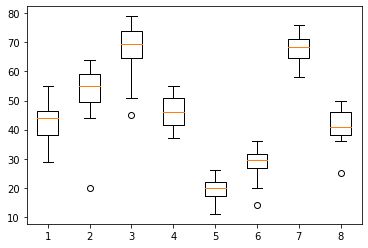

In [283]:
temp = pd.DataFrame(temp)
plt.boxplot(temp[['none_clear', 'low_clear', 'med_clear', 'high_clear',
                  'none_blur', 'low_blur', 'med_blur', 'high_blur']]);

In [228]:
# two-way mixed design

## Regression Analysis

In [45]:
import pandas as pd

house = pd.read_csv('data/sap/regression/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
house_temp = house[['price', 'sqft_living','floors', 'bathrooms','sqft_lot']]
house_temp.corr()

,price,sqft_living,floors,bathrooms,sqft_lot
price,1.000000,0.702035,0.256794,0.525138,0.089661
sqft_living,0.702035,1.000000,0.353949,0.754665,0.172826
floors,0.256794,0.353949,1.000000,0.500653,-0.005201
bathrooms,0.525138,0.754665,0.500653,1.000000,0.087740
sqft_lot,0.089661,0.172826,-0.005201,0.087740,1.000000


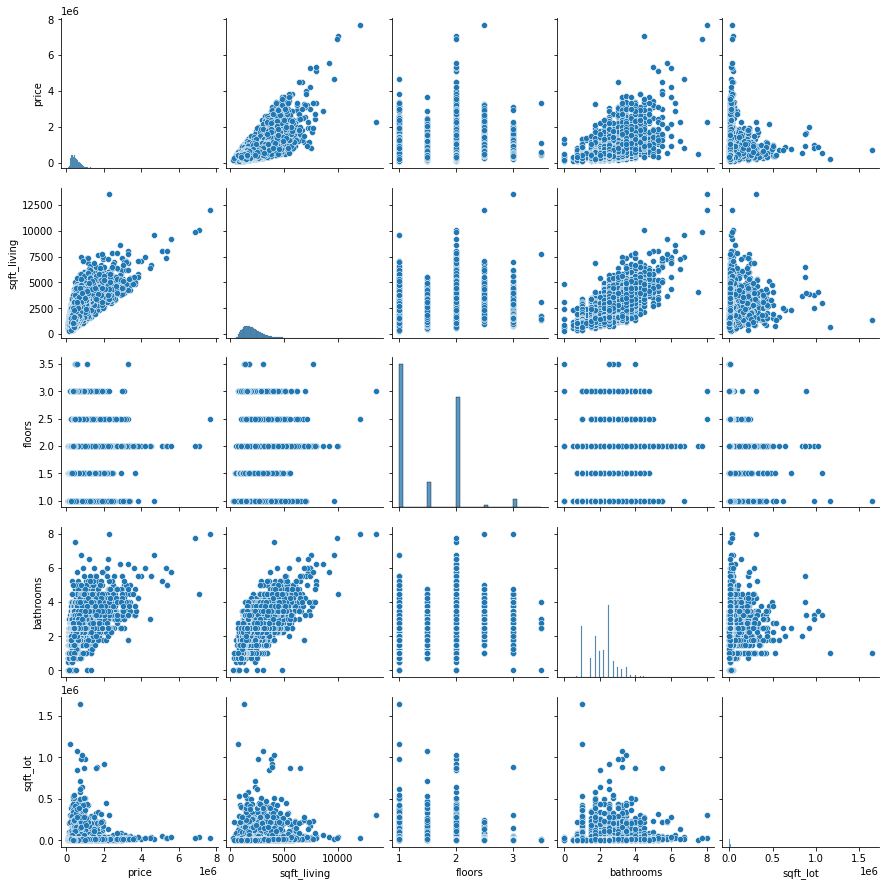

In [33]:
import seaborn as sns

sns.pairplot(house_temp);

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(house_temp.values, i ) for i in range(house_temp.shape[1])]
vif['features'] = house_temp.columns

vif = vif.sort_values(by='VIF', ascending=False)
vif = vif.reset_index().drop(columns='index')
vif


,VIF,features
0,21.773941,bathrooms
1,20.650293,sqft_living
2,8.878416,floors
3,6.238228,price
4,1.176051,sqft_lot


In [43]:
import seaborn as sns

sns.heatmap(house_temp, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1);

Error in callback <function flush_figures at 0x7f9e6487c290> (for post_execute):


KeyboardInterrupt: 

In [25]:
from statsmodels.formula.api import ols

lr = ols('price ~ sqft_living + floors', data=house_temp).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:05:16   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21610   BIC:                         6.006e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.044e+04   5775.171     -8.733      0.000   -6.18e+04   -3.91e+04
sqft_living   279.2796      2.070    134.897      0.000     275.222     283.338
floors       6458.2607   3521.299      1.834      0.067    -443.745    1.34e+04
==============================================================================
Omnibus:                    14877.388   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           552498.184
Skew:                           2.834   Prob(JB):                         0.00
Kurtosis:                      27.112   Cond. No.                     8.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
from statsmodels.formula.api import ols

lr = ols('price ~ sqft_living + floors + sqft_living * floors', data=house_temp).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     7189.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:05:53   Log-Likelihood:            -3.0012e+05
No. Observations:               21613   AIC:                         6.003e+05
Df Residuals:                   21609   BIC:                         6.003e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.477e+05   1.31e+04     11.281      0.000    1.22e+05    1.73e+05
sqft_living          172.7082      6.655     25.950      0.000     159.663     185.753
floors             -1.164e+05   8089.871    -14.383      0.000   -1.32e+05      -1e+05
sqft_living:floors    63.0559      3.745     16.837      0.000      55.715      70.397
==============================================================================
Omnibus:                    14261.392   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           470673.433
Skew:                           2.697   Prob(JB):                         0.00
Kurtosis:                      25.216   Cond. No.                     3.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

원래 sqft_living, floor 회귀분석시 floor는 유의하지 않았으나, 교호작용 항이 조절변수로 들어가면서 floor 유의해짐, +로 유의했던게 -로 유의해지고 VIF가 커질 것. 분산을 훕수했으므로 교호작용은 사용하면 안됨

In [41]:
from statsmodels.formula.api import ols

lr = ols('price ~ floors + bedrooms + waterfront', data=house).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1878.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:53:01   Log-Likelihood:            -3.0510e+05
No. Observations:               21613   AIC:                         6.102e+05
Df Residuals:                   21609   BIC:                         6.102e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.93e+04   9651.059     -4.072      0.000   -5.82e+04   -2.04e+04
floors      1.376e+05   4185.368     32.875      0.000    1.29e+05    1.46e+05
bedrooms    1.084e+05   2429.372     44.615      0.000    1.04e+05    1.13e+05
waterfront  1.118e+06   2.57e+04     43.457      0.000    1.07e+06    1.17e+06
==============================================================================
Omnibus:                    17694.980   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1059041.445
Skew:                           3.534   Prob(JB):                         0.00
Kurtosis:                      36.557   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from statsmodels.formula.api import ols

lr = ols('price ~ floors + bedrooms + waterfront + waterfront * bedrooms', data=house).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     1507.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:55:16   Log-Likelihood:            -3.0495e+05
No. Observations:               21613   AIC:                         6.099e+05
Df Residuals:                   21608   BIC:                         6.099e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.483e+04   9617.046     -2.582      0.010   -4.37e+04   -5983.163
floors               1.374e+05   4155.507     33.072      0.000    1.29e+05    1.46e+05
bedrooms             1.042e+05   2423.802     42.977      0.000    9.94e+04    1.09e+05
waterfront          -2.709e+05   8.26e+04     -3.281      0.001   -4.33e+05   -1.09e+05
waterfront:bedrooms  4.206e+05   2.38e+04     17.686      0.000    3.74e+05    4.67e+05
==============================================================================
Omnibus:                    17378.110   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           996061.562
Skew:                           3.446   Prob(JB):                         0.00
Kurtosis:                      35.536   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
from statsmodels.formula.api import ols

lr = ols('price ~ sqft_living + floors', data=house_temp).fit(cov_type='HC0')
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1705.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:05:19   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21610   BIC:                         6.006e+05
Df Model:                           2                                         
Covariance Type:                  HC0                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.044e+04   9411.678     -5.359      0.000   -6.89e+04    -3.2e+04
sqft_living   279.2796      6.100     45.786      0.000     267.324     291.235
floors       6458.2607   3887.131      1.661      0.097   -1160.375    1.41e+04
==============================================================================
Omnibus:                    14877.388   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           552498.184
Skew:                           2.834   Prob(JB):                         0.00
Kurtosis:                      27.112   Cond. No.                     8.06e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 8.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

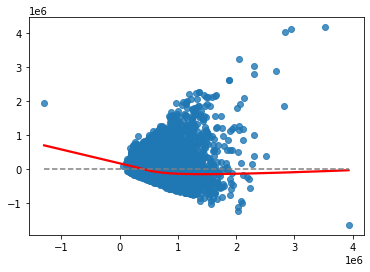

In [58]:
# residual plotting with customization
import matplotlib.pyplot as plt

living_ols = ols('price ~ sqft_living + bedrooms', data=house).fit()
preds = living_ols.predict(house[['sqft_living','bedrooms']])
residual = house['price'] - preds

sns.regplot(preds, residual, lowess=True, line_kws={'color': 'red'});
plt.plot([preds.min(), preds.max()], [0,0],'--',color='grey');

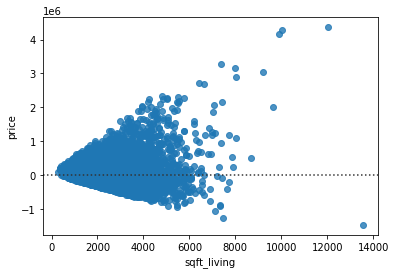

In [57]:
sns.residplot(data=house, x='sqft_living', y='price');

## Moderating Effect

In [59]:
import pandas as pd

house = pd.read_csv('data/sap/regression/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
from statsmodels.formula.api import ols

model = ols('price ~ floors', data=house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1526.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.58e-322
Time:                        16:31:13   Log-Likelihood:            -3.0687e+05
No. Observations:               21613   AIC:                         6.137e+05
Df Residuals:                   21611   BIC:                         6.138e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.792e+05   7101.851     39.313      0.000    2.65e+05    2.93e+05
floors      1.746e+05   4469.727     39.060      0.000    1.66e+05    1.83e+05
==============================================================================
Omnibus:                    19377.136   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1260093.172
Skew:                           4.077   Prob(JB):                         0.00
Kurtosis:                      39.507   Cond. No.                         6.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model = ols('price ~ floors + waterfront', data=house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1668.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:32:03   Log-Likelihood:            -3.0605e+05
No. Observations:               21613   AIC:                         6.121e+05
Df Residuals:                   21610   BIC:                         6.121e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.771e+05   6839.645     40.519      0.000    2.64e+05    2.91e+05
floors      1.704e+05   4305.794     39.573      0.000    1.62e+05    1.79e+05
waterfront  1.105e+06   2.69e+04     41.122      0.000    1.05e+06    1.16e+06
==============================================================================
Omnibus:                    17979.713   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1024533.203
Skew:                           3.647   Prob(JB):                         0.00
Kurtosis:                      35.932   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
model = ols('price ~ floors + waterfront + floors * waterfront', data=house)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     1134.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:50:37   Log-Likelihood:            -3.0602e+05
No. Observations:               21613   AIC:                         6.121e+05
Df Residuals:                   21609   BIC:                         6.121e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.815e+05   6854.744     41.062      0.000    2.68e+05    2.95e+05
floors             1.675e+05   4317.284     38.795      0.000    1.59e+05    1.76e+05
waterfront         5.022e+05   8.41e+04      5.974      0.000    3.37e+05    6.67e+05
floors:waterfront  3.676e+05   4.86e+04      7.569      0.000    2.72e+05    4.63e+05
==============================================================================
Omnibus:                    17982.903   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1019003.961
Skew:                           3.650   Prob(JB):                         0.00
Kurtosis:                      35.837   Cond. No.                         76.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model.exog_names

['Intercept', 'floors', 'waterfront', 'floors:waterfront']

In [76]:
# ols model's VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({'columns' : column, 'VIF': variance_inflation_factor(model.exog, i)} for i, column in enumerate(model.exog_names) if column != 'Intercept')

vif = vif.sort_values(by='VIF', ascending=False)
vif = vif.reset_index().drop(columns='index')
vif


,columns,VIF
0,floors:waterfront,9.834358
1,waterfront,9.814393
2,floors,1.008529


## Mediating Effect
1) 매개변수에 대해서 -로 유의

2) 종속변수에 대해서 +로 유의

3) 매개변수에 독립변수를 추가했는데 둘다 유의, 기존 독립변수 추정치는 작아짐 : 부분매개
- 총효과 $(-0.1847 * -0.1354) + 0.0886 = 0.1136$

In [77]:
import pandas as pd

student = pd.read_csv('data/sap/moderation/student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [79]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [83]:
from statsmodels.formula.api import ols

model1 = ols('studytime ~ Dalc', data=student)
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              studytime   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     15.70
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           8.80e-05
Time:                        17:18:45   Log-Likelihood:                -483.01
No. Observations:                 395   AIC:                             970.0
Df Residuals:                     393   BIC:                             978.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3090      0.081     28.677      0.000       2.151       2.467
Dalc          -0.1847      0.047     -3.963      0.000      -0.276      -0.093
==============================================================================
Omnibus:                       23.821   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.756
Skew:                           0.635   Prob(JB):                     1.55e-06
Kurtosis:                       3.102   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
from statsmodels.formula.api import ols

model2 = ols('failures ~ Dalc', data=student)
result = model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               failures   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.411
Date:                Tue, 19 Dec 2023   Prob (F-statistic):            0.00677
Time:                        17:18:46   Log-Likelihood:                -439.30
No. Observations:                 395   AIC:                             882.6
Df Residuals:                     393   BIC:                             890.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1660      0.072      2.302      0.022       0.024       0.308
Dalc           0.1136      0.042      2.722      0.007       0.032       0.196
==============================================================================
Omnibus:                      196.858   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.141
Skew:                           2.332   Prob(JB):                    1.29e-163
Kurtosis:                       7.881   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# 3단계에서 매개변수가 들어왔는데 기존 독립변수가 커지면 뭔가 잘못된 것
# 부분매개 결론
from statsmodels.formula.api import ols

model3 = ols('failures ~ Dalc + studytime', data=student)
result = model3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               failures   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.369
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           0.000276
Time:                        17:19:35   Log-Likelihood:                -434.73
No. Observations:                 395   AIC:                             875.5
Df Residuals:                     392   BIC:                             887.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4785      0.125      3.814      0.000       0.232       0.725
Dalc           0.0886      0.042      2.103      0.036       0.006       0.171
studytime     -0.1354      0.045     -3.029      0.003      -0.223      -0.047
==============================================================================
Omnibus:                      187.346   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.925
Skew:                           2.236   Prob(JB):                    2.49e-145
Kurtosis:                       7.524   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regression Analysis

In [96]:
import pandas as pd

titanic = pd.read_csv('data/sap/logistic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
titanic_temp.isnull().sum()

Survived         0
Age            177
Fare             0
SibSp            0
Sex_encoded      0
dtype: int64

https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html

In [124]:
import statsmodels.api as sm

titanic_temp = titanic[['Survived','Fare','Sex','SibSp']]
titanic_temp['Sex_encoded'] = titanic_temp['Sex'].map(lambda x: 1 if x == 'male' else 0)
titanic_temp.drop('Sex', axis=1, inplace=True)
X = titanic_temp.loc[:, titanic_temp.columns != 'Survived']
y = titanic_temp['Survived']
model = sm.Logit(y,X) 
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.501111
         Iterations 6


/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.2475
Time:                        14:32:15   Log-Likelihood:                -446.49
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.696e-64
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Fare            0.0199      0.003      7.665      0.000       0.015       0.025
SibSp          -0.2517      0.081     -3.122      0.002      -0.410      -0.094
Sex_encoded    -1.9088      0.129    -14.823      0.000      -2.161      -1.656
===============================================================================
"""

In [135]:
result.predict(X)

0      0.117493
1      0.762319
2      0.539307
3      0.690818
4      0.148201
         ...   
886    0.161059
887    0.644835
888    0.553418
889    0.212085
890    0.147450
Length: 891, dtype: float64

$\begin{bmatrix}2 & 1 \\1 & 2 \end{bmatrix} \begin{bmatrix}X_1 \\X_2 &\end{bmatrix} = 3 \begin{bmatrix}X_1 \\X_2 &\end{bmatrix}  $

